## Monte Carlo Approximation of the Area of a Half-Circle

In this Notebook we will implement a Monte Carlo Approximation of the area of a half circle. The function describing a half circle is given by

$$
f(x) = \sqrt{1-x^2}, \quad x \in [-1, 1].
$$

The Monte Carlo Approximation states that

$$
\int^b_a f(x) dx \approx \frac{1}{N} \sum^N_{j=1} (b-a) f(x_j)
$$

for $a < b$ and $x_j$ uniformly distributed on $[a,b]$.

In [48]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [24]:
def function_halfcircle(x):
    return np.sqrt(1-x**2)

In [29]:
x = np.arange(start = -1, stop = 1, step = 0.01)
y = function_halfcircle(x)

fig = px.line(x=x, y=y, title="Half-Circle")
fig.show()

In [38]:
def MCquad(f, a, b, N):

    # step size
    delta = 1 / N

    length_interval = b - a

    # generate N uniformly distributed x
    x = np.random.uniform(a,b,N)
    # evaluate function for x
    y = f(x)

    # approximate integral
    integral = delta * np.sum(length_interval * y)

    return(integral)

We will approximate the integral for different numbers of randomly generated x and use these to calculate an error between the approximations and the exact area.

In [ ]:
# exact area
exact_area = 0.5 * np.pi

In [43]:
# approximate integral for 2^i points
exponents = range(4, 21)
Ns = []
errors = []

for i in exponents:
    N = 2 ** i
    approx_area = MCquad(function_halfcircle, -1, 1, N)
    error = abs(exact_area - approx_area)

    Ns.append(N)
    errors.append(error)

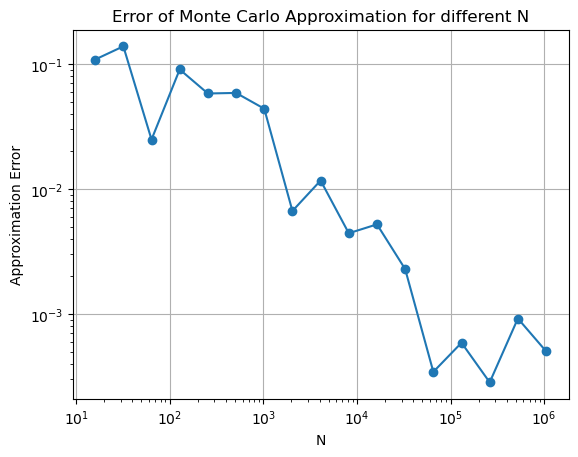

In [50]:
plt.loglog(Ns, errors, marker='o', linestyle='-')
plt.xlabel('N')
plt.ylabel('Approximation Error')
plt.title('Error of Monte Carlo Approximation for different N')
plt.grid(True)
plt.show()

We can clearly see that the approximation gets better for increasing N.